In [1]:
# for analysis
import pandas as pd
import numpy as np

# for visulaization
import matplotlib.pyplot as plt
import seaborn as sns

# extra
import warnings
warnings.filterwarnings(action="ignore")

In [2]:
# Read and learn the data 
Leads=pd.read_csv("Leads.csv",encoding="ISO-8859-1")
Leads.shape

(9240, 37)

In [3]:
Leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [4]:
Leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

# 1. Data Cleaning

###  1.1  Delete the columns with null value more than 30%

In [5]:
# Find the Null values in decending order
Leads.isnull().sum().sort_values(ascending=False)/len(Leads)  *100


Lead Quality                                     51.590909
Asymmetrique Activity Index                      45.649351
Asymmetrique Profile Score                       45.649351
Asymmetrique Activity Score                      45.649351
Asymmetrique Profile Index                       45.649351
Tags                                             36.287879
Lead Profile                                     29.318182
What matters most to you in choosing a course    29.318182
What is your current occupation                  29.112554
Country                                          26.634199
How did you hear about X Education               23.885281
Specialization                                   15.562771
City                                             15.367965
Page Views Per Visit                              1.482684
TotalVisits                                       1.482684
Last Activity                                     1.114719
Lead Source                                       0.3896

In [6]:
# Dropping the columns that has more than 30% null values


for column in Leads.columns:
    if Leads[column].isnull().sum()/len(Leads)*100 >30:
        Leads.drop(column,axis=1,inplace=True)
    
    

In [7]:
Leads.isnull().sum().sort_values(ascending=False)/len(Leads)  *100

What matters most to you in choosing a course    29.318182
Lead Profile                                     29.318182
What is your current occupation                  29.112554
Country                                          26.634199
How did you hear about X Education               23.885281
Specialization                                   15.562771
City                                             15.367965
Page Views Per Visit                              1.482684
TotalVisits                                       1.482684
Last Activity                                     1.114719
Lead Source                                       0.389610
Get updates on DM Content                         0.000000
Newspaper                                         0.000000
I agree to pay the amount through cheque          0.000000
A free copy of Mastering The Interview            0.000000
Update me on Supply Chain Content                 0.000000
Receive More Updates About Our Courses            0.0000

In [8]:
Leads.shape

(9240, 31)

### 1. 2 Lets check each column Values and handle them based on its usage,unique values, null value and Select value

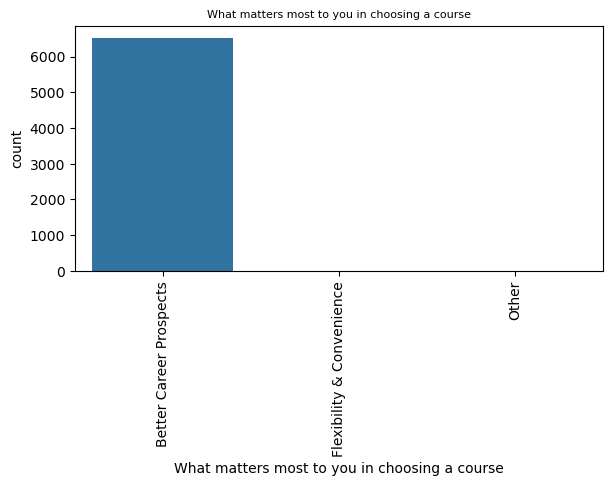

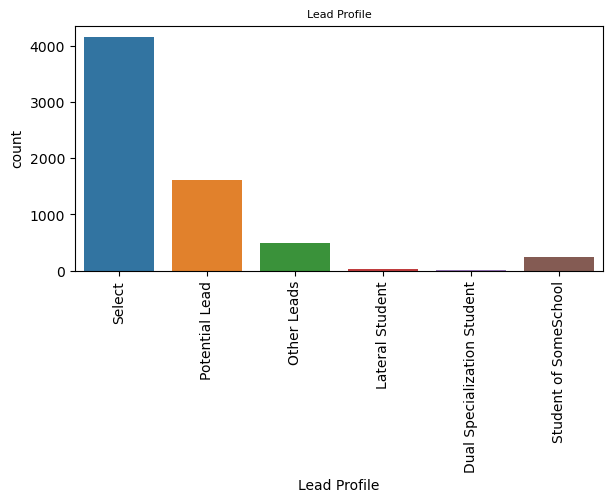

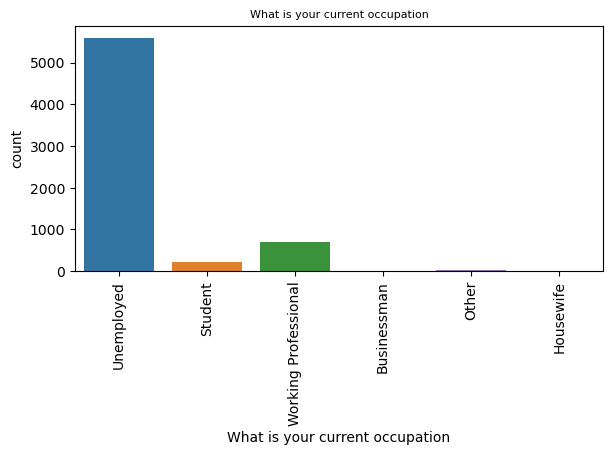

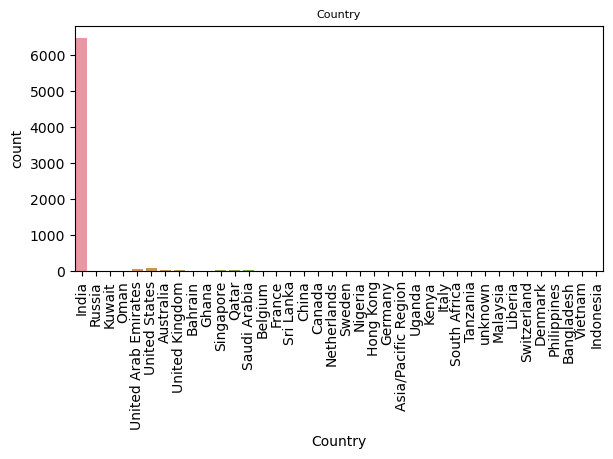

In [9]:
#Visualize Top 3

def countplot(column,fig):
    plt.figure(figsize=(15, 7))
    plt.subplot(2,2, fig)
    sns.countplot(x=Leads[column])
    plt.title(column,size=8)
    
    plt.xticks(rotation=90)

countplot("What matters most to you in choosing a course",1)

countplot("Lead Profile",2)
countplot("What is your current occupation",3)
countplot("Country",4)



#### In all the 4 columns any one category is having high %  of valuecount compared to other categories and null/select count is also high. Hence keeping the coumns will not be usefull. 
#### Lets check each column individually inclusing NA value counts and Select value counts and drop as needed

In [10]:
# Creating function to calculate value counts % of column inclusing null and select 
def valuecounts(column):
    print(Leads[column].value_counts(dropna=False)/len(Leads)  *100)

# Creating function to drop a column in place

def dropcol(column):
    Leads.drop(column,axis=1,inplace=True)
    

In [11]:
# Lets check column "What matters most to you in choosing a course"
valuecounts("What matters most to you in choosing a course")


Better Career Prospects      70.649351
NaN                          29.318182
Flexibility & Convenience     0.021645
Other                         0.010823
Name: What matters most to you in choosing a course, dtype: float64


In [12]:
# Dropping  column "What matters most to you in choosing a course"
dropcol("What matters most to you in choosing a course")

In [13]:
# Lets check column "Lead Profile"

valuecounts("Lead Profile")


Select                         44.870130
NaN                            29.318182
Potential Lead                 17.456710
Other Leads                     5.270563
Student of SomeSchool           2.608225
Lateral Student                 0.259740
Dual Specialization Student     0.216450
Name: Lead Profile, dtype: float64


In [14]:
#Select and NA is more than 60 % hence dropping the column

dropcol("Lead Profile")


In [15]:
# Handling "What is your current occupation"

valuecounts("What is your current occupation")

Unemployed              60.606061
NaN                     29.112554
Working Professional     7.640693
Student                  2.272727
Other                    0.173160
Housewife                0.108225
Businessman              0.086580
Name: What is your current occupation, dtype: float64


In [16]:
# 60% is unemployed and ~30% is null. The column will not add any value hence dropping

dropcol("What is your current occupation")

In [17]:
#Handling "Country"

valuecounts("Country")

India                   70.259740
NaN                     26.634199
United States            0.746753
United Arab Emirates     0.573593
Singapore                0.259740
Saudi Arabia             0.227273
United Kingdom           0.162338
Australia                0.140693
Qatar                    0.108225
Bahrain                  0.075758
Hong Kong                0.075758
Oman                     0.064935
France                   0.064935
unknown                  0.054113
Kuwait                   0.043290
South Africa             0.043290
Canada                   0.043290
Nigeria                  0.043290
Germany                  0.043290
Sweden                   0.032468
Philippines              0.021645
Uganda                   0.021645
Italy                    0.021645
Bangladesh               0.021645
Netherlands              0.021645
Asia/Pacific Region      0.021645
China                    0.021645
Belgium                  0.021645
Ghana                    0.021645
Kenya         

In [18]:
# Only one country has ~ 70% of the values and  Select value is also high. Imputing the values does not add any value hence dropping the column as it can be of no significance

dropcol("Country")



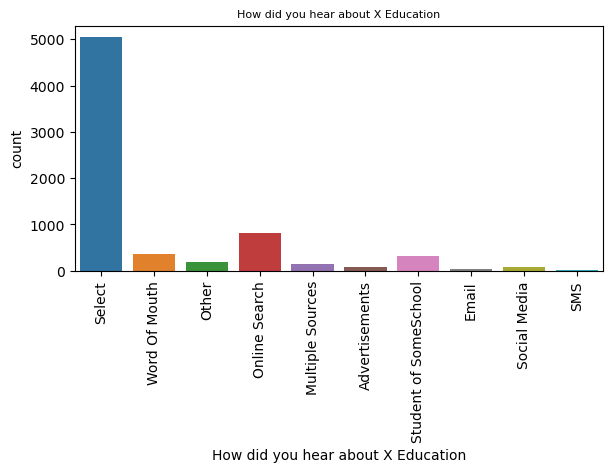

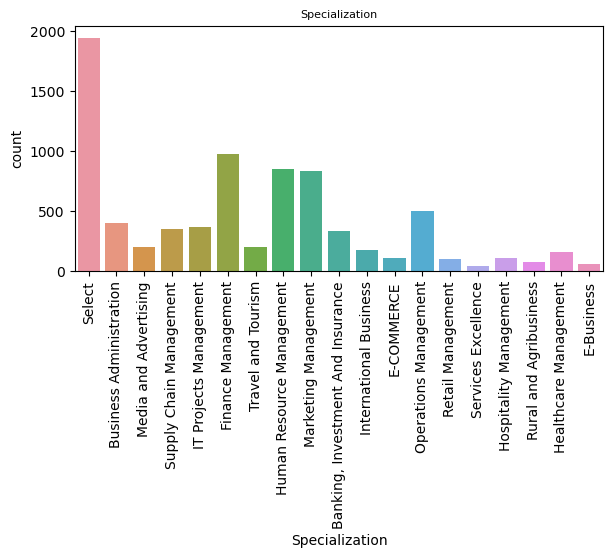

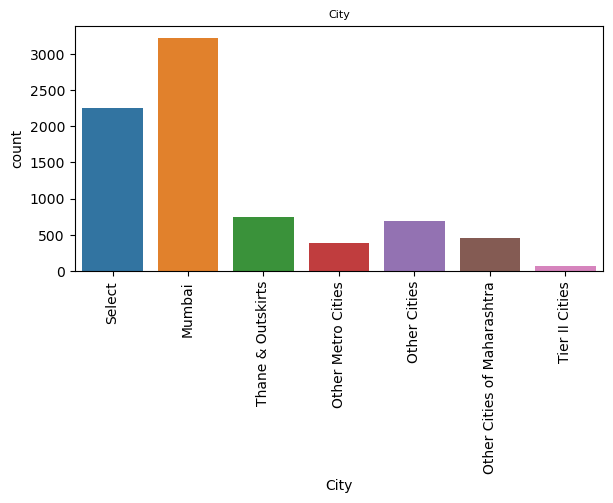

In [19]:
#Visualize the rest of the 3 top columns in Null values

countplot("How did you hear about X Education",1)
countplot("Specialization",2)
countplot("City",3)

In [20]:
#Handle "How did you hear about X Education"

valuecounts("How did you hear about X Education")

Select                   54.577922
NaN                      23.885281
Online Search             8.744589
Word Of Mouth             3.766234
Student of SomeSchool     3.354978
Other                     2.012987
Multiple Sources          1.645022
Advertisements            0.757576
Social Media              0.725108
Email                     0.281385
SMS                       0.248918
Name: How did you hear about X Education, dtype: float64


In [21]:
 # Select and NA is more than 80%
    
dropcol("How did you hear about X Education")

In [22]:
#Lets see "Specialization"  column

valuecounts("Specialization")

Select                               21.017316
NaN                                  15.562771
Finance Management                   10.562771
Human Resource Management             9.177489
Marketing Management                  9.069264
Operations Management                 5.443723
Business Administration               4.361472
IT Projects Management                3.961039
Supply Chain Management               3.777056
Banking, Investment And Insurance     3.658009
Travel and Tourism                    2.196970
Media and Advertising                 2.196970
International Business                1.926407
Healthcare Management                 1.720779
Hospitality Management                1.233766
E-COMMERCE                            1.212121
Retail Management                     1.082251
Rural and Agribusiness                0.790043
E-Business                            0.616883
Services Excellence                   0.432900
Name: Specialization, dtype: float64


In [23]:
#~36 % of Na and select hence dropping

dropcol("Specialization")

In [24]:
# handle City 

valuecounts("City")

Mumbai                         34.870130
Select                         24.339827
NaN                            15.367965
Thane & Outskirts               8.138528
Other Cities                    7.424242
Other Cities of Maharashtra     4.945887
Other Metro Cities              4.112554
Tier II Cities                  0.800866
Name: City, dtype: float64


In [25]:
# Imbalance feature and null& select contribute ~40% Hence dropping
dropcol("City")

In [26]:
# Checking for columns with null value again and its row counts

Leads.isnull().sum().sort_values(ascending=False)



TotalVisits                                 137
Page Views Per Visit                        137
Last Activity                               103
Lead Source                                  36
Prospect ID                                   0
X Education Forums                            0
A free copy of Mastering The Interview        0
I agree to pay the amount through cheque      0
Get updates on DM Content                     0
Update me on Supply Chain Content             0
Receive More Updates About Our Courses        0
Through Recommendations                       0
Digital Advertisement                         0
Newspaper                                     0
Magazine                                      0
Newspaper Article                             0
Lead Number                                   0
Search                                        0
Total Time Spent on Website                   0
Converted                                     0
Do Not Call                             

In [27]:
#number of row is very low hence deleting the rows with null value

Leads.dropna(inplace= True)
Leads.shape


(9074, 24)

In [28]:
Leads.isnull().sum().sort_values(ascending=False)

Prospect ID                                 0
Lead Number                                 0
A free copy of Mastering The Interview      0
I agree to pay the amount through cheque    0
Get updates on DM Content                   0
Update me on Supply Chain Content           0
Receive More Updates About Our Courses      0
Through Recommendations                     0
Digital Advertisement                       0
Newspaper                                   0
X Education Forums                          0
Newspaper Article                           0
Magazine                                    0
Search                                      0
Last Activity                               0
Page Views Per Visit                        0
Total Time Spent on Website                 0
TotalVisits                                 0
Converted                                   0
Do Not Call                                 0
Do Not Email                                0
Lead Source                       

### 1.3 Need to find the category column and handle the rows with Select values

In [29]:
# find thelist of object columns

object_col=Leads.select_dtypes(include='object').columns.tolist()
object_col

['Prospect ID',
 'Lead Origin',
 'Lead Source',
 'Do Not Email',
 'Do Not Call',
 'Last Activity',
 'Search',
 'Magazine',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Receive More Updates About Our Courses',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'I agree to pay the amount through cheque',
 'A free copy of Mastering The Interview',
 'Last Notable Activity']

In [30]:
# Find out the count of row in each column with word "Select"
for column in object_col:
    select=0
    print(column, " : ", end= " ")
    for i in range (len(Leads)-1):
        if (Leads.loc[0,column]) =="Select":
            select+=1
    print(select)
            
    
    

Prospect ID  :  0
Lead Origin  :  0
Lead Source  :  0
Do Not Email  :  0
Do Not Call  :  0
Last Activity  :  0
Search  :  0
Magazine  :  0
Newspaper Article  :  0
X Education Forums  :  0
Newspaper  :  0
Digital Advertisement  :  0
Through Recommendations  :  0
Receive More Updates About Our Courses  :  0
Update me on Supply Chain Content  :  0
Get updates on DM Content  :  0
I agree to pay the amount through cheque  :  0
A free copy of Mastering The Interview  :  0
Last Notable Activity  :  0


### No columns have the value "Select" anymore

### 1.4 Remove the inter and ID columns as they dont have any significance in predictions


In [31]:
# ID columns are "Prospect ID","Lead Number"
dropcol("Prospect ID")
dropcol("Lead Number")

In [32]:
Leads.shape

(9074, 22)

#  2. Data Visulization and Analysis

In [33]:
Leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 22 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Lead Origin                               9074 non-null   object 
 1   Lead Source                               9074 non-null   object 
 2   Do Not Email                              9074 non-null   object 
 3   Do Not Call                               9074 non-null   object 
 4   Converted                                 9074 non-null   int64  
 5   TotalVisits                               9074 non-null   float64
 6   Total Time Spent on Website               9074 non-null   int64  
 7   Page Views Per Visit                      9074 non-null   float64
 8   Last Activity                             9074 non-null   object 
 9   Search                                    9074 non-null   object 
 10  Magazine                            

In [34]:
# List of Categorical and COntinuous column

cat_col=Leads.select_dtypes(include='object').columns.tolist()
num_col=Leads.select_dtypes(include=["int","float"]).columns.tolist()
cat_col

['Lead Origin',
 'Lead Source',
 'Do Not Email',
 'Do Not Call',
 'Last Activity',
 'Search',
 'Magazine',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Receive More Updates About Our Courses',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'I agree to pay the amount through cheque',
 'A free copy of Mastering The Interview',
 'Last Notable Activity']

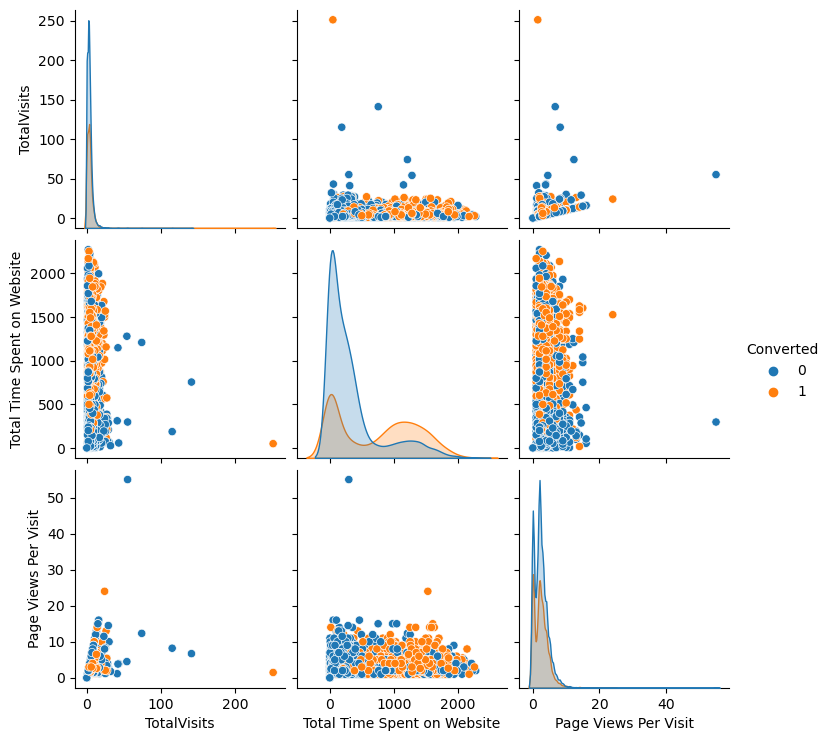

In [35]:
sns.pairplot(Leads,diag_kind='kde',hue='Converted')

### Observation:

#### As the time spent on website increases the conversion is also increasing. 


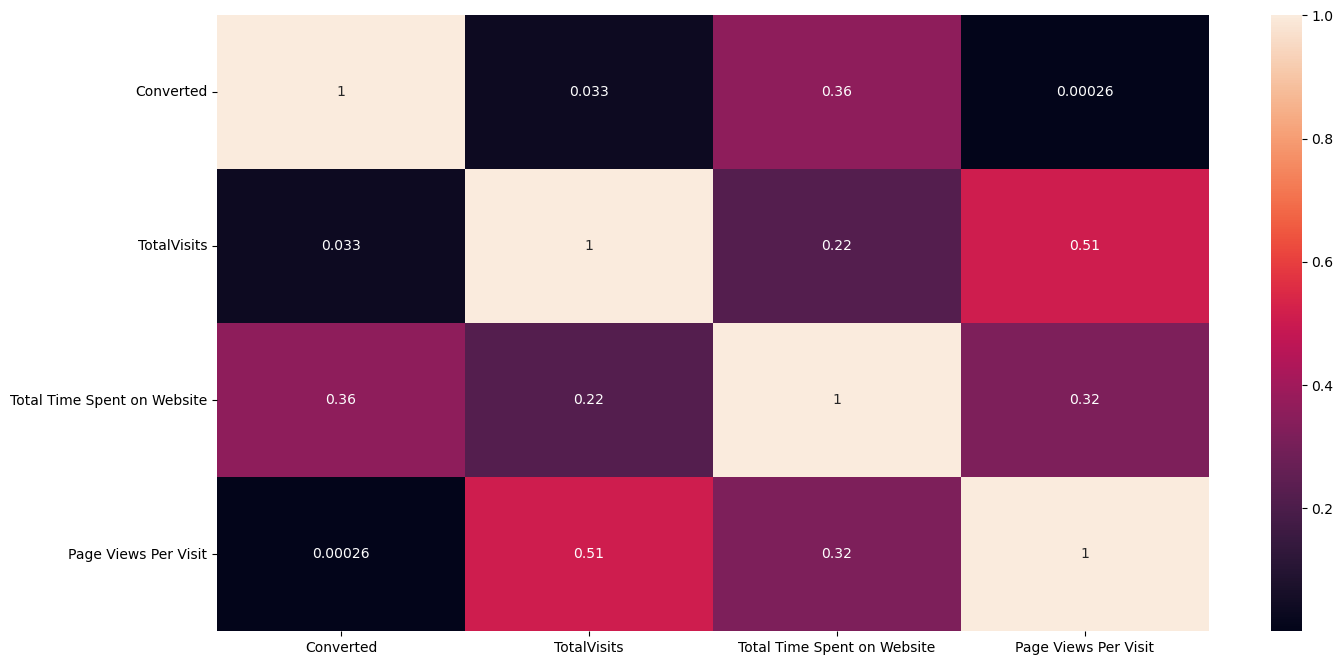

In [36]:
plt.figure(figsize=(16,8))
sns.heatmap(Leads.corr(),annot=True)
plt.show()


# 3. Data Preperation

###  3.1 Creating dummy Variables

In [37]:
pd.set_option('display.max_columns', None)
Leads.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,No,No,No,No,No,No,No,No,No,No,No,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,No,No,No,No,No,No,No,No,No,No,No,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,No,No,No,No,No,No,No,No,No,No,No,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,No,No,No,No,No,No,No,No,No,No,No,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,No,No,No,No,No,No,No,No,No,No,No,No,Modified


In [38]:
# Features with more than 2 category  : "Lead Origin","Lead Source","Last Activity","Last Notable Activity"
# Creating dummy variable for each columns

dummy_list=["Lead Origin","Lead Source","Last Activity","Last Notable Activity"]

for i in dummy_list:
    dummy=pd.get_dummies(Leads[i], prefix= i, drop_first=True)
    Leads=pd.concat([Leads,dummy], axis = 1)
    Leads.drop(i,axis=1, inplace = True)


In [39]:
Leads.head()

,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,No,No,0,0.0,0,0.0,No,No,No,No,No,No,No,No,No,No,No,No,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,No,No,0,5.0,674,2.5,No,No,No,No,No,No,No,No,No,No,No,No,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,No,No,1,2.0,1532,2.0,No,No,No,No,No,No,No,No,No,No,No,Yes,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,No,No,0,1.0,305,1.0,No,No,No,No,No,No,No,No,No,No,No,No,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,No,No,1,2.0,1428,1.0,No,No,No,No,No,No,No,No,No,No,No,No,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [40]:
# Checking count before binary conversion
Leads.Search.value_counts()

No     9060
Yes      14
Name: Search, dtype: int64

### 3.2 Convert Yes/No coulmns to Binary column

In [41]:


# Remove the dummy_list from the categorical column cat_col

for i in dummy_list:
    cat_col = list(filter(lambda x: x != i, cat_col))

# now cat_col only have features that have Yes/No


In [42]:
# Change the Yes/No columns to binary
def change_binary(x):
    if x=="Yes":
        return 1
    else:
        return 0


for i in cat_col:
    Leads[i]=Leads[i].apply(change_binary)
    


In [43]:
Leads.head()

,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0,0.0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,5.0,674,2.5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,0,0,1,2.0,1532,2.0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1.0,305,1.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,0,0,1,2.0,1428,1.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [44]:
# Checking the count before after binay conversion
Leads.Search.value_counts()

0    9060
1      14
Name: Search, dtype: int64

### 3.3 Split the data for Train and test


In [45]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm

In [46]:
df_train, df_test = train_test_split(Leads, train_size = 0.7, test_size = 0.3, random_state = 100)

In [47]:
y_train=df_train["Converted"]
X_train =df_train.drop("Converted", axis=1)
X_train.head()


,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
3009,0,0,2.0,397,2.0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1012,1,0,2.0,190,2.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9226,0,0,0.0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4750,0,0,2.0,1380,2.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
7987,0,0,5.0,1584,2.5,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


### 3.4 Scaling using Minmax scaler

In [48]:
num_col=list(filter(lambda x: x != "Converted", num_col))
num_col

['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']

In [49]:
# Scaling the numerical /continuous column and only on the X_train because y_train is alreday binary values
scaler = MinMaxScaler()
X_train[num_col] = scaler.fit_transform(X_train[num_col])

In [50]:
X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
3009,0,0,0.007968,0.178347,0.083333,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1012,1,0,0.007968,0.085355,0.083333,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9226,0,0,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4750,0,0,0.007968,0.619946,0.083333,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
7987,0,0,0.019920,0.711590,0.104167,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


# 4. Data Modelling

### 4.1  Feature selection using RFE

In [51]:
#import stats library
from scipy import stats
import statsmodels.api as sm

#import sklearn libraries

from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import metrics
from sklearn.metrics import classification_report,recall_score,roc_auc_score,roc_curve,accuracy_score,precision_score,precision_recall_curve,confusion_matrix
from sklearn.preprocessing import LabelEncoder

In [52]:

logreg=LogisticRegression()


In [53]:
rfe = RFE(estimator=logreg,n_features_to_select=20)             # running RFE with 20 variables as output
rfe = rfe.fit(X_train, y_train)

In [54]:
selected_feature = X_train.columns[rfe.support_]
selected_feature

Index(['Do Not Email', 'TotalVisits', 'Total Time Spent on Website',
       'Newspaper', 'Lead Origin_Lead Add Form', 'Lead Origin_Lead Import',
       'Lead Source_Olark Chat', 'Lead Source_Reference',
       'Lead Source_Social Media', 'Lead Source_Welingak Website',
       'Lead Source_google', 'Last Activity_Converted to Lead',
       'Last Activity_Email Bounced', 'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation',
       'Last Notable Activity_Email Link Clicked',
       'Last Notable Activity_Email Opened', 'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_Page Visited on Website'],
      dtype='object')

## 4.2     Model 1 -  Using 20 RFE selected Features

In [55]:
X_train=X_train[selected_feature]

In [56]:
# Fit a logistic Regression model on X_train after adding a constant and output the summary uisng stats model

X_train_sm = sm.add_constant(X_train)
logm1 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial()).fit()
print(logm1.summary())


                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6330
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2777.6
Date:                Tue, 20 Feb 2024   Deviance:                       5555.1
Time:                        11:58:52   Pearson chi2:                 6.49e+03
No. Iterations:                    20   Pseudo R-squ. (CS):             0.3677
Covariance Type:            nonrobust                                         
                                                    coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------

There are few features that have  p value more than 0.05  -Newspaper , Lead Source_Social Media,Lead Source_google

### Checking VIF


In [57]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,Lead Origin_Lead Add Form,62.42
7,Lead Source_Reference,47.93
9,Lead Source_Welingak Website,15.45
17,Last Notable Activity_Modified,2.22
14,Last Activity_Olark Chat Conversation,1.99
0,Do Not Email,1.81
12,Last Activity_Email Bounced,1.77
1,TotalVisits,1.60
2,Total Time Spent on Website,1.59
6,Lead Source_Olark Chat,1.57


## 4.3  Model 2  - Dropping "Newspaper"

In [58]:
X_train=X_train.drop("Newspaper",axis=1)

In [59]:
X_train_sm = sm.add_constant(X_train)
logm2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial()).fit()
print(logm2.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6331
Model Family:                Binomial   Df Model:                           19
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2779.6
Date:                Tue, 20 Feb 2024   Deviance:                       5559.2
Time:                        11:58:53   Pearson chi2:                 6.48e+03
No. Iterations:                    20   Pseudo R-squ. (CS):             0.3673
Covariance Type:            nonrobust                                         
                                                    coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------

In [60]:
# Checking VIF

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,Lead Origin_Lead Add Form,62.42
6,Lead Source_Reference,47.93
8,Lead Source_Welingak Website,15.45
16,Last Notable Activity_Modified,2.22
13,Last Activity_Olark Chat Conversation,1.99
0,Do Not Email,1.81
11,Last Activity_Email Bounced,1.77
1,TotalVisits,1.60
2,Total Time Spent on Website,1.59
5,Lead Source_Olark Chat,1.57


 PValue:   Following features have p value more than 0.05 -  Lead Source_Social Media,Lead Source_google
 VIF  :  value still high for Lead Origin_Lead Add Form, Lead Source_Reference, Lead Source_Welingak Website

## 4.4  Model 3  - Dropping "Lead Source_google"

In [61]:
X_train=X_train.drop("Lead Source_google",axis=1)

In [62]:
X_train_sm = sm.add_constant(X_train)
logm3 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial()).fit()
print(logm3.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6332
Model Family:                Binomial   Df Model:                           18
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2780.9
Date:                Tue, 20 Feb 2024   Deviance:                       5561.9
Time:                        11:58:54   Pearson chi2:                 6.49e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3670
Covariance Type:            nonrobust                                         
                                                    coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------

In [63]:

# Checking VIF


vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,Lead Origin_Lead Add Form,62.42
6,Lead Source_Reference,47.93
8,Lead Source_Welingak Website,15.45
15,Last Notable Activity_Modified,2.21
12,Last Activity_Olark Chat Conversation,1.99
0,Do Not Email,1.80
10,Last Activity_Email Bounced,1.77
1,TotalVisits,1.60
2,Total Time Spent on Website,1.59
5,Lead Source_Olark Chat,1.57


PValue:   Following features have p value more than 0.05 -  Lead Source_Social Media

VIF  :  value still high for Lead Origin_Lead Add Form, Lead Source_Reference, Lead Source_Welingak Website


## 4.5  Model 4 :  Dropping "Lead Source_Social Media"

In [64]:
X_train=X_train.drop("Lead Source_Social Media",axis=1)

In [65]:
X_train_sm = sm.add_constant(X_train)
logm4 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial()).fit()
print(logm4.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6333
Model Family:                Binomial   Df Model:                           17
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2781.8
Date:                Tue, 20 Feb 2024   Deviance:                       5563.6
Time:                        11:58:54   Pearson chi2:                 6.48e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3668
Covariance Type:            nonrobust                                         
                                                    coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------

In [66]:

# Checking VIF


vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,Lead Origin_Lead Add Form,62.42
6,Lead Source_Reference,47.93
7,Lead Source_Welingak Website,15.45
14,Last Notable Activity_Modified,2.21
11,Last Activity_Olark Chat Conversation,1.99
0,Do Not Email,1.80
9,Last Activity_Email Bounced,1.77
1,TotalVisits,1.60
2,Total Time Spent on Website,1.59
5,Lead Source_Olark Chat,1.57


### PValue for all feature is less than 0.05


###  VIF  :  value still high for Lead Origin_Lead Add Form, Lead Source_Reference, Lead Source_Welingak Website


## 4.6  Model 5 : dropping  "Lead Origin_Lead Add Form"

In [67]:
X_train=X_train.drop("Lead Origin_Lead Add Form",axis=1)

In [68]:
X_train_sm = sm.add_constant(X_train)
logm5 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial()).fit()
print(logm5.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6334
Model Family:                Binomial   Df Model:                           16
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2784.6
Date:                Tue, 20 Feb 2024   Deviance:                       5569.2
Time:                        11:58:55   Pearson chi2:                 6.48e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3663
Covariance Type:            nonrobust                                         
                                                    coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------

In [69]:

# Checking VIF


vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
13,Last Notable Activity_Modified,2.21
10,Last Activity_Olark Chat Conversation,1.99
0,Do Not Email,1.80
8,Last Activity_Email Bounced,1.77
1,TotalVisits,1.60
2,Total Time Spent on Website,1.59
4,Lead Source_Olark Chat,1.57
12,Last Notable Activity_Email Opened,1.47
14,Last Notable Activity_Olark Chat Conversation,1.35
7,Last Activity_Converted to Lead,1.24


### Now p Value and VIF both are under control for all features. Hence use the model 5 as final model and make prediction and do model evaluation



# 5. Model Evaluation

In [70]:
# Use 'predict' to predict the probabilities on the train set using model 5 : logm5

y_train_pred = logm5.predict(sm.add_constant(X_train))
y_train_pred[:10]

3009    0.215301
1012    0.039969
9226    0.221257
4750    0.898262
7987    0.712622
1281    0.802279
2880    0.110024
4971    0.931235
7536    0.890601
1248    0.656499
dtype: float64

In [71]:
# Reshaping it into an array

y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.21530063, 0.03996881, 0.22125702, 0.89826171, 0.712622  ,
       0.80227939, 0.11002429, 0.93123469, 0.890601  , 0.65649859])

### Creating a new dataframe containing the actual conversion flag and the probabilities(lead score) predicted by the model


In [72]:

y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Lead Score':y_train_pred})
y_train_pred_final.head()

,Converted,Lead Score
0,0,0.215301
1,0,0.039969
2,0,0.221257
3,1,0.898262
4,1,0.712622


### Creating new column 'Predicted' with 1 if Paid_Prob > 0.5 else 0

In [73]:
y_train_pred_final['Predicted'] = y_train_pred_final["Lead Score"].map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Lead Score,Predicted
0,0,0.215301,0
1,0,0.039969,0
2,0,0.221257,0
3,1,0.898262,1
4,1,0.712622,1


### Now we have the lead score for traim data and its predicted value of cut off 0.5

### Create Confusion Matrix

In [74]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion)

[[3415  490]
 [ 783 1663]]


### Evaluate Metrics

In [75]:

TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives
                                
                                

In [76]:
print ("Accuracy   : ",metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))
print ("Sensitivity: ", TP/(TP+FN))
print ("Specificity: ", TN/(TN+FP))
print ("Precision:   ", TP/(TP + FP))
print ("Recall:   ", TP /(TP + FN))
                                
                                

Accuracy   :  0.7995591245473154
Sensitivity:  0.6798855273916599
Specificity:  0.8745198463508322
Precision:    0.7724105898745935
Recall:    0.6798855273916599


### Finding the Optimal Cutoff

#### Now 0.5 was just arbitrary to loosely check the model performace. But in order to get good results, you need to optimise the threshold. So first let's plot an ROC curve to see what AUC we get.

In [77]:
# ROC function

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [78]:
fpr, tpr, thresholds = metrics.roc_curve(y_train_pred_final.Converted,
                    y_train_pred_final["Lead Score"], 
                                         drop_intermediate=False)

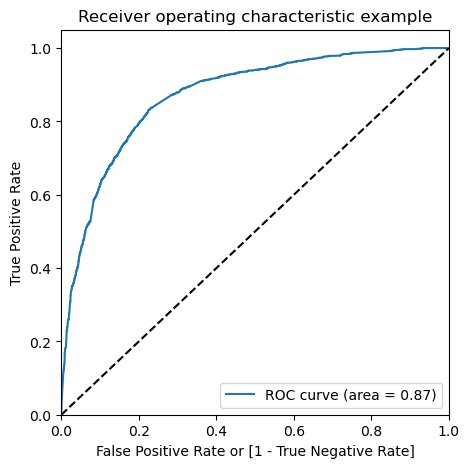

In [79]:
# Calling the ROC function

draw_roc(y_train_pred_final.Converted, y_train_pred_final["Lead Score"])

#### The area is 0.87 which means its a good model. Let's also check the sensitivity and specificity tradeoff to find the optimal cutoff point.

In [80]:
# Let's create columns with different probability cutoffs 

numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final["Lead Score"].map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Lead Score,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.215301,0,1,1,1,0,0,0,0,0,0,0
1,0,0.039969,0,1,0,0,0,0,0,0,0,0,0
2,0,0.221257,0,1,1,1,0,0,0,0,0,0,0
3,1,0.898262,1,1,1,1,1,1,1,1,1,1,0
4,1,0.712622,1,1,1,1,1,1,1,1,1,0,0


In [81]:
# Let's create a dataframe to see the values of accuracy, sensitivity, and specificity at 
# different values of probabiity cutoffs

cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.385136  1.000000  0.000000
0.1   0.1  0.577232  0.973835  0.328809
0.2   0.2  0.723351  0.917825  0.601536
0.3   0.3  0.795308  0.832379  0.772087
0.4   0.4  0.799874  0.762469  0.823303
0.5   0.5  0.799559  0.679886  0.874520
0.6   0.6  0.790112  0.598937  0.909859
0.7   0.7  0.760038  0.464841  0.944942
0.8   0.8  0.737522  0.373262  0.965685
0.9   0.9  0.692962  0.224039  0.986684


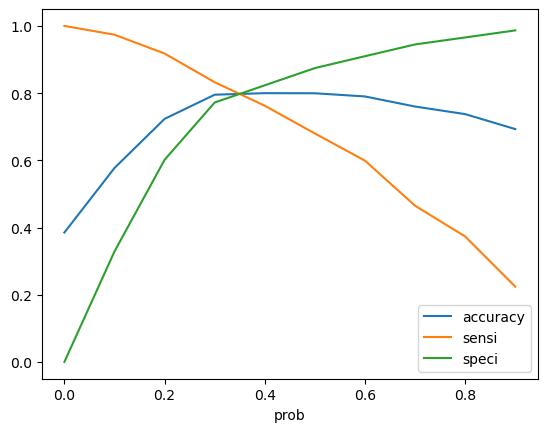

In [82]:
# Let's plot it as well

cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

As you can se|e that around `0.38`, you get the optimal values of the three metrics. So let's choose 0.33 as our cutoff now.

In [83]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final["Lead Score"])

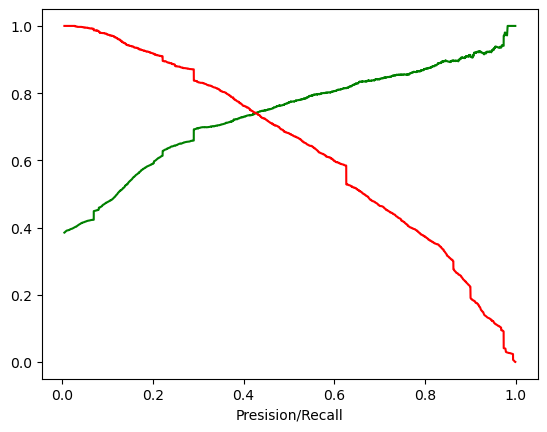

In [84]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.xlabel("Presision/Recall")
plt.show()

In [85]:
y_train_pred_final['final_predicted'] = y_train_pred_final["Lead Score"].map( lambda x: 1 if x > 0.33 else 0)

y_train_pred_final.head()

,Converted,Lead Score,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.215301,0,1,1,1,0,0,0,0,0,0,0,0
1,0,0.039969,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.221257,0,1,1,1,0,0,0,0,0,0,0,0
3,1,0.898262,1,1,1,1,1,1,1,1,1,1,0,1
4,1,0.712622,1,1,1,1,1,1,1,1,1,0,0,1


In [86]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3050,  855],
       [ 439, 2007]], dtype=int64)

In [87]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [88]:
print ("Accuracy   : ",metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))
print ("Sensitivity: ", TP/(TP+FN))
print ("Specificity: ", TN/(TN+FP))
print ("Precision: ", TP/(TP+FP))
print("Recall : ", TP/(TP+FN))

Accuracy   :  0.7995591245473154
Sensitivity:  0.8205233033524121
Specificity:  0.7810499359795134
Precision:  0.7012578616352201
Recall :  0.8205233033524121


# 6 Make Prediction on Test Data

In [89]:
# Split the test data in X and Y access

y_test=df_test["Converted"]
X_test=df_test.drop("Converted",axis=1)

X_test.head()


,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
3271,0,0,4.0,157,4.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1490,0,0,5.0,1513,5.0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
7936,0,0,2.0,74,2.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4216,0,0,0.0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3830,0,0,8.0,164,8.0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [90]:
num_col

['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']

In [91]:
# Scaling the numerical /continuous column 
X_test[num_col] =  scaler.transform(X_test[num_col])

In [92]:
X_test.head(2)

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
3271,0,0,0.015936,0.070530,0.166667,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1490,0,0,0.019920,0.679695,0.208333,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [93]:
# Few Col in X Train was dropped during modelling. We have to drop the same columns for X Test data

X_test=X_test[selected_feature]   # Selected RFE supported columns


In [94]:
# Droping the 4 columns dropped in modelling  - "Newspaper", "Lead Source_google", "Lead Source_Social Media" , "Lead Origin_Lead Add Form"

X_test=X_test.drop(["Newspaper", "Lead Source_google", "Lead Source_Social Media" , "Lead Origin_Lead Add Form"],axis=1)

## Making prediction using Test data using Model 5  : logm5

In [95]:
y_test_pred = logm5.predict(sm.add_constant(X_test))

In [96]:
y_test_pred = pd.DataFrame(y_test_pred)

In [97]:
y_test_pred.head()

,0
3271,0.148816
1490,0.754504
7936,0.122399
4216,0.862794
3830,0.164512


In [98]:
# Converting y_test to dataframe

y_test_df = pd.DataFrame(y_test)

In [99]:
y_test_df.head()

,Converted
3271,0
1490,1
7936,0
4216,1
3830,0


In [100]:
# Combining both the DF to display y test and y predicted 
y_test_pred_final = pd.concat([y_test_df, y_test_pred],axis=1)

In [101]:
y_test_pred_final.head()

,Converted,0
3271,0,0.148816
1490,1,0.754504
7936,0,0.122399
4216,1,0.862794
3830,0,0.164512


In [102]:
y_test_pred_final= y_test_pred_final.rename(columns = {0 : 'Lead Score'})

In [103]:
y_test_pred_final.head()

,Converted,Lead Score
3271,0,0.148816
1490,1,0.754504
7936,0,0.122399
4216,1,0.862794
3830,0,0.164512


In [104]:
# Make predictions on the test set using 0.38 as the cutoff

y_test_pred_final['final_predicted'] = y_test_pred_final["Lead Score"].map(lambda x: 1 if x > 0.33 else 0)

In [105]:
y_test_pred_final.head()

,Converted,Lead Score,final_predicted
3271,0,0.148816,0
1490,1,0.754504,1
7936,0,0.122399,0
4216,1,0.862794,1
3830,0,0.164512,0


In [106]:
confusion = metrics.confusion_matrix(y_test_pred_final.Converted, y_test_pred_final["final_predicted"] )
print(confusion)

[[1347  387]
 [ 207  782]]


In [107]:
# Evaluate Metrics

TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [108]:
print ("Accuracy   : ",metrics.accuracy_score(y_test_pred_final.Converted, y_test_pred_final["final_predicted"]))
print ("Sensitivity: ", TP/(TP+FN))
print ("Specificity: ", TN/(TN+FP))
print ("Precision:   ", TP/(TP + FP))
print ("Recall:   ", TP /(TP + FN))

Accuracy   :  0.7818582445831803
Sensitivity:  0.7906976744186046
Specificity:  0.7768166089965398
Precision:    0.6689478186484175
Recall:    0.7906976744186046
